## Exercise 01: Predict breast cancer

Load the **breast_cancer** dataset in `sklearn.datasets.load_breast_cancer` and play with different classification models to get the best possible cancer estimator

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "none"

In [93]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [94]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [96]:
#Split the dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=100,
                                                    shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [97]:
X_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.00000,455.000000,455.000000,455.000000
mean,14.013776,19.256374,91.155692,642.805275,0.096157,0.103081,0.085774,0.047847,0.180293,0.062767,...,16.067492,25.573670,105.796791,854.711429,0.131728,0.249649,0.26272,0.112790,0.287347,0.083519
std,3.456429,4.279891,23.734308,340.857214,0.013606,0.050419,0.074792,0.037275,0.026092,0.006736,...,4.664202,6.065845,32.256954,533.770178,0.021816,0.152725,0.19942,0.063961,0.057589,0.017281
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.490000,50.410000,185.200000,0.071170,0.027290,0.00000,0.000000,0.156500,0.055040
25%,11.710000,16.170000,74.860000,421.950000,0.086475,0.065600,0.029360,0.020365,0.162050,0.058220,...,13.010000,21.070000,84.035000,514.900000,0.116600,0.147450,0.10960,0.064530,0.250200,0.071865
50%,13.270000,18.830000,85.840000,541.600000,0.095790,0.092280,0.060150,0.033840,0.178800,0.061550,...,14.850000,25.230000,97.170000,677.300000,0.130900,0.211600,0.22410,0.099750,0.281500,0.079870
75%,15.595000,21.805000,102.750000,748.050000,0.104900,0.130100,0.121500,0.068095,0.195300,0.066100,...,18.100000,29.485000,122.900000,1001.300000,0.145150,0.324400,0.37570,0.158900,0.315400,0.091860
max,28.110000,39.280000,188.500000,2499.000000,0.163400,0.311400,0.426800,0.201200,0.274300,0.095020,...,33.120000,49.540000,220.800000,3216.000000,0.218400,1.058000,1.25200,0.290300,0.577400,0.207500


# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(
    penalty="l2",     # Regularization: Type of regularization to apply to the model
    C=1.0,            # Regularization: The regularization parameter. The smaller, the stronger the regularization applied. 1.0 means no regularization
    l1_ratio=0,       # Regularization: Only used for Elacti Nets (penalty="elasticnet"). Controls the strength of l1 and l2 regularization
    dual=False,       # If train usign the dual of primal formualtion. In general, prefer dual=False when n_samples > n_features
    solver="lbfgs",    # The solver used internally to train the model
    random_state=102 # Random state to use when shuffling the data
)

In [99]:
#Fit the model to the training data

model_logistic.fit(X_train, y_train)

/Users/sahanaroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sahanaroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(l1_ratio=0, random_state=102)

In [100]:
y_test_pred = model_logistic.predict(X_test)
y_test_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

In [101]:
#Evaluate the model
accuracy = model_logistic.score(X_test, y_test)
print(f"Accuracy: {round(accuracy,3)}")

Accuracy: 0.947


In [102]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[46,  3],
       [ 3, 62]])

In [103]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        49
           1       0.95      0.95      0.95        65

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



# Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(
    criterion='gini',          # The criteria to measure the quality of a split. Leave as "gini"
    max_depth=None,            # The maximum number of levels (depth) of the resulting tree. The more depth, the more complex (and the more risk of overfitting)
    min_samples_split=2,       # The minimum number of samples if a leaf to promote for splitting. The smaller this number, the more complex (and the more risk of overfitting)
    min_samples_leaf=1,        # The minimum number of samples in a terminal leaf of any branch. The smaller this number, the more complex (and the more risk of overfitting)
    random_state=101                  # The seed used by the random number generator
)

In [105]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [106]:
accuracy = model_dt.score(X_test, y_test)
print(f"Accuracy: {round(accuracy,3)}")

Accuracy: 0.939


In [107]:
#Confusion Matrix

y_pred_3 = model_dt.predict(X_test)
confusion_matrix(y_test, y_pred_3)

array([[46,  3],
       [ 4, 61]])

In [108]:
#Classification Report

print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        49
           1       0.95      0.94      0.95        65

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [109]:
#Visualize the tree

from sklearn import tree
import graphviz

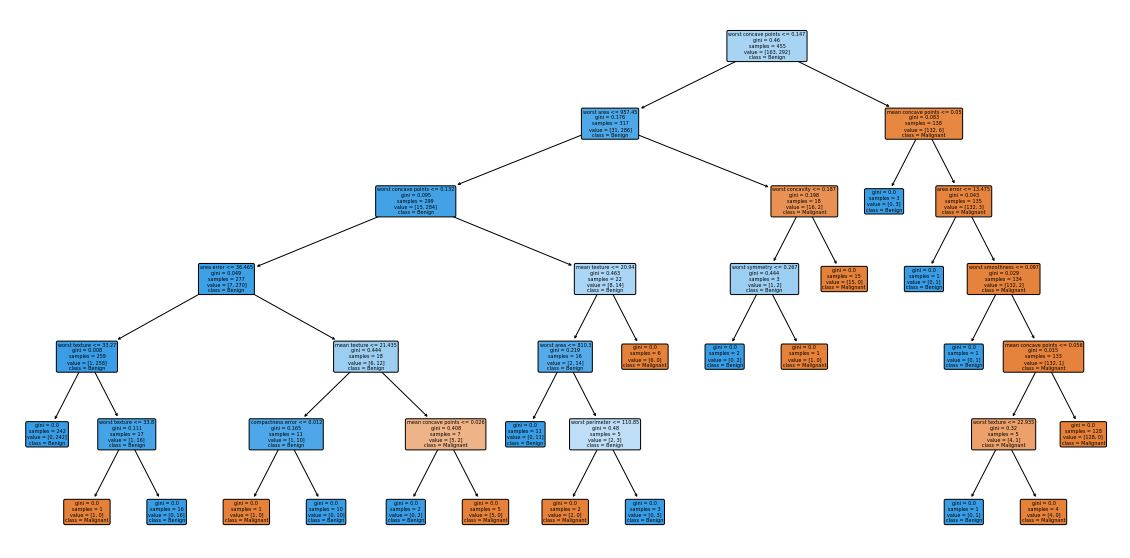

In [110]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_dt, filled=True, rounded=True, class_names=["Malignant", "Benign"], feature_names=X.columns)
plt.show()


# K-Nearest Neighbor

In [111]:
from sklearn.neighbors import KNeighborsClassifier

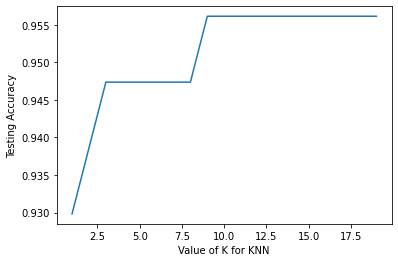

In [112]:
#Plot the accuracy for different values of k

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [113]:
#Ideal value of k is 10

In [114]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,
                             weights='distance').fit(X_train, y_train)

In [115]:
accuracy = model_knn.score(X_test, y_test)
print(f"Accuracy: {round(accuracy,3)}")

Accuracy: 0.965


In [116]:
#Confusion Matrix

y_pred_2 = model_knn.predict(X_test)
confusion_matrix(y_test, y_pred_2)

array([[48,  1],
       [ 3, 62]])

In [117]:
#Classification Report

print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       0.98      0.95      0.97        65

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.96       114



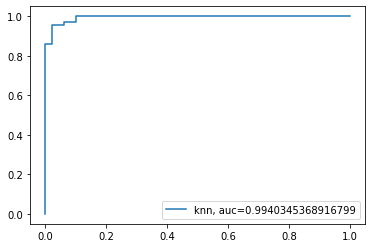

In [118]:
#Plot the ROC curve

from sklearn.metrics import roc_curve, auc

y_pred_proba = model_knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = auc(fpr,tpr)

plt.plot(fpr,tpr,label="knn, auc="+str(auc)) # Plot the ROC curve
plt.legend(loc=4) # Add the legend
plt.show() # Show the plot
